In [55]:
import torch
import numpy as np
from time import time
from matplotlib import pyplot as plt

n = 10**8

start = time()
array_1 = np.zeros(n, dtype='object')
array_2 = torch.tensor(np.random.randint(0, 65535, n, dtype='int32'), dtype=torch.int16, device='cuda:0')
array_1 = array_1[torch.argsort(array_2).cpu()];
print(time()-start)

start = time()
array_1 = np.zeros(n, dtype='object')
array_2 = np.random.randint(0, 65535, n, dtype='int32')
array_1[np.argsort(array_2)]
print(time()-start)

13.55739688873291
31.375142574310303


In [56]:
n_base = 10
times_torch = []
times_numpy = []
for i in range(1, 8):
    n = n_base**i
    start = time()
    array_1 = np.zeros(n, dtype='object')
    array_2 = torch.tensor(np.random.randint(0, 65535, n, dtype='int32'), dtype=torch.int16, device='cuda:0')
    array_1 = array_1[torch.argsort(array_2).cpu()];
    computation_time = time()-start
    times_torch += [computation_time]
    
    start = time()
    array_1 = np.zeros(n, dtype='object')
    array_2 = np.random.randint(0, 65535, n, dtype='int32')
    array_1[np.argsort(array_2)]
    computation_time = time()-start
    times_numpy += [computation_time]


In [57]:
times_torch

[0.2787168025970459,
 0.0001380443572998047,
 0.00017070770263671875,
 0.0005941390991210938,
 0.0031919479370117188,
 0.04748344421386719,
 1.1758379936218262]

In [58]:
times_numpy

[4.291534423828125e-05,
 2.0503997802734375e-05,
 6.079673767089844e-05,
 0.0006215572357177734,
 0.008217096328735352,
 0.12479329109191895,
 2.2913880348205566]

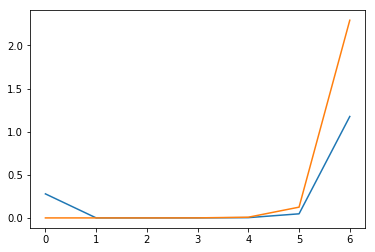

In [59]:
plt.plot(times_torch)
plt.plot(times_numpy)